In [1]:
import pandas as pd
mushroom_data = pd.read_csv(r"C:\Users\Dell\Downloads\mushroom.csv")
print(mushroom_data.head())


   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat

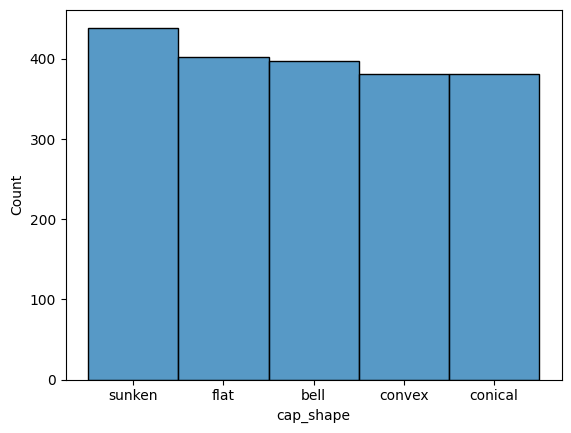

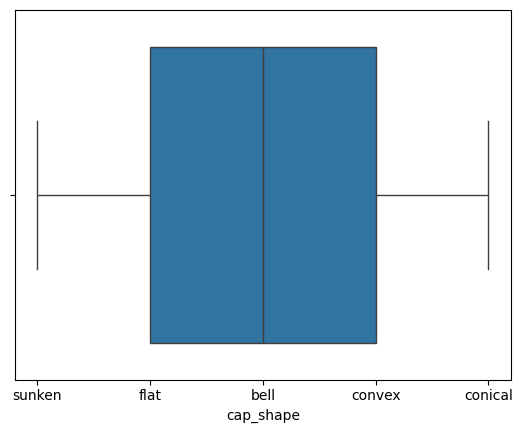

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for a feature
sns.histplot(mushroom_data['cap_shape'])
plt.show()


# Boxplot for feature distribution
sns.boxplot(x=mushroom_data['cap_shape'])
plt.show()



C:\Users\Dell\AppData\Local\Temp\ipykernel_8236\550970277.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = mushroom_data.corr()


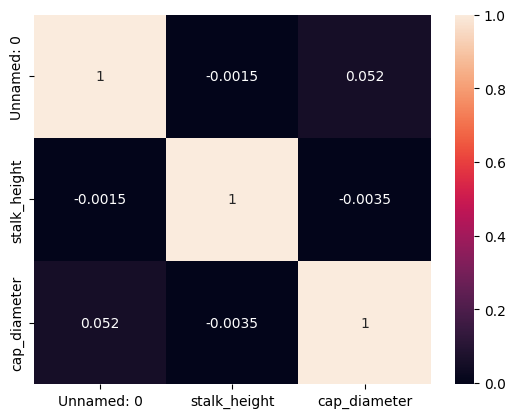

In [6]:
correlation_matrix = mushroom_data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


In [7]:
mushroom_data_encoded = pd.get_dummies(mushroom_data, drop_first=True)


In [12]:
from sklearn.model_selection import train_test_split

# Drop the target column 'class_poisonous' and use the remaining columns as features
X = mushroom_data_encoded.drop('class_poisonous', axis=1)  # Dropping the target column
y = mushroom_data_encoded['class_poisonous']  # Target column for classification

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)  # Check the shapes of the splits


(1400, 105) (600, 105) (1400,) (600,)


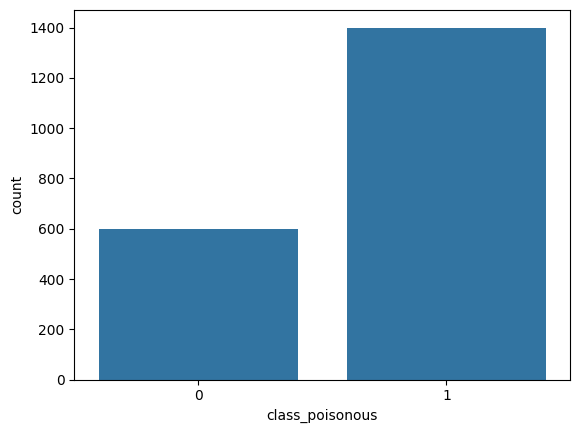

In [16]:
sns.countplot(x='class_poisonous', data=mushroom_data_encoded)
plt.show()


In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_model = SVC(kernel='linear')  # You can change kernel type here
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluate model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.7033333333333334
              precision    recall  f1-score   support

           0       0.56      0.18      0.28       185
           1       0.72      0.93      0.81       415

    accuracy                           0.70       600
   macro avg       0.64      0.56      0.54       600
weighted avg       0.67      0.70      0.65       600



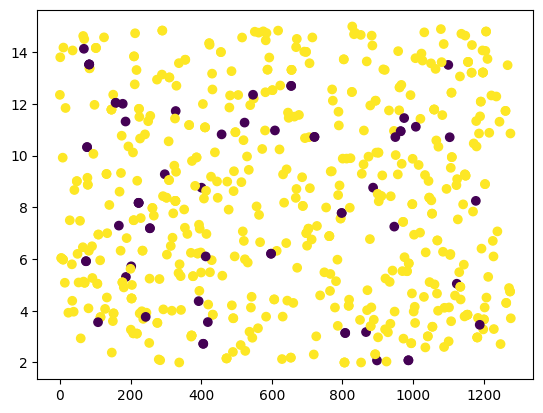

In [19]:
# Select the first two features for plotting
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, cmap='viridis', marker='o')
plt.show()


In [21]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

random_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=5, cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
print(f"Best parameters: {random_search.best_params_}")


Best parameters: {'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}


In [ ]:
print(mushroom_data_encoded.columns)


Index(['Unnamed: 0', 'stalk_height', 'cap_diameter', 'cap_shape_conical',
       'cap_shape_convex', 'cap_shape_flat', 'cap_shape_sunken',
       'cap_surface_grooves', 'cap_surface_scaly', 'cap_surface_smooth',
       ...
       'population_scattered', 'population_several', 'population_solitary',
       'habitat_leaves', 'habitat_meadows', 'habitat_paths', 'habitat_urban',
       'habitat_waste', 'habitat_woods', 'class_poisonous'],
      dtype='object', length=106)


Index(['Unnamed: 0', 'stalk_height', 'cap_diameter', 'cap_shape_conical',
       'cap_shape_convex', 'cap_shape_flat', 'cap_shape_sunken',
       'cap_surface_grooves', 'cap_surface_scaly', 'cap_surface_smooth',
       ...
       'population_scattered', 'population_several', 'population_solitary',
       'habitat_leaves', 'habitat_meadows', 'habitat_paths', 'habitat_urban',
       'habitat_waste', 'habitat_woods', 'class_poisonous'],
      dtype='object', length=106)


In [3]:
print(mushroom_data.columns)


Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')
